# Introduction 

<font color="green">  This notebook is created as an assignment task provided by Rosebay Consulting, Kathmandu. The task is to predict whether the customer will pay back loan or not based on the dataset provided by the company. The dataset contains 23000 mock data. I am doing the prediction using data manipulation techniques and various machine learning algorithms so that i can achieve maximum accuracy. 

The benchmark for the accuracy is __96%__. With one of the models, I got the __accuracy of more than 96%__ with one of the models.

<br> 
<font color="blue"> **_Author: Shekhar Koirala_** 

**_Email: shekharkoirala78@gmail.com_**


## Keys 

X1: Amount of the given credit (dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
X2: Gender (1 = male; 2 = female). 
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
X4: Marital status (1 = married; 2 = single; 3 = others). 
X5: Age (year). 
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

## Explaining Observations

In this dataset, each row is an observational unit: One row represent for one clients. The 23000 observations means the dataset collect 23000 different clients in total, and we use different ID for each row to indicate each clients.

We divide these 23000 clients to 70% training data and 30% testing data to do analysis. By analyzing the data, we can build several appropriate models with important features to predict whether a cardholder is likely to default.

## Common Knowledge 

We pay off our credit card monthly with a minimum amount of money. There always has a due date that you have to pay off the money you borrowed (or at least the minimum amount) by that deadline. If we fail to pay off, it comes to loan delinquency, at the time the bank can charge us a “late fee”. Extended delinquency can result a loan default. The consequences of you loan and any interest you owe becomes immediately due can result into that you can no longer receive deferment or forbearance, and you lose eligibility for other benefits, such as the ability to choose a repayment plan.

### The notebook is structured as follows:

- __Loading Data__: Loading the provided data.
- __Exploratory Data Analysis__: just to see what we have.

- __Data Cleaning__: time to make choices about undocumented labels.

- __Data Preprocessing__: Encoding the categorical variables and feature selection.

- __Feature engineering__: time to be creative to derive new features that can help in making better prediction and analysis.

- __Dimensionality Reduction__: Seeing if we can further optimize and tune our features.

- __Applying ML Models__: Applying various Machine Learning Models to predict the result.

- __Model Optimization and Final Results__: Applying various optimization techniques like GridSearchCV, etc to optimize the models.
- __Conclusion__

### Importing the necessary libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import random 
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import OneHotEncoder,LabelBinarizer,StandardScaler, Imputer, LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

### Loading the data

In [108]:
data=pd.read_csv("Loan-data.csv", header=1)
print(data.shape)

(22999, 25)


In [109]:
data.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

#### Lets change the name of the target column [default payment next month to def_pay]

In [110]:
data.rename(columns={'default payment next month':'def_pay'}, inplace=True) # changing the column name


In [111]:
data.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  def_pay  
0         0         0         0        1  
1      1000         0      2000        1  
2      1000      1000      5000        0  
3      1100      1069      1000        0  
4      9000       689       679        0  

[5 rows x 25 columns]

In [112]:
data.shape

(22999, 25)

### Individual Feature Exploration 

Text(0.5, 1.0, 'Credit Card Default Counts')

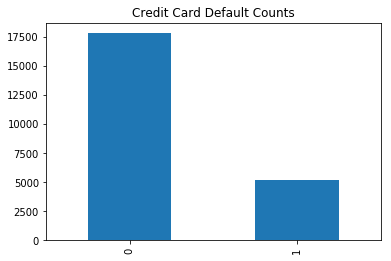

In [113]:
pd.value_counts(data['def_pay']).plot.bar()
plt.title("Credit Card Default Counts")

The 5 most common credit card limits. Besides being in the ten thousands, there was not much of a patern. There were also no cards without limits, or that had an unlisted limit.

In [114]:
print(data['LIMIT_BAL'].value_counts().nlargest(5))
print('\nNANs found:', sum(data['LIMIT_BAL']==0) )

50000     2654
20000     1542
30000     1306
80000     1210
200000    1159
Name: LIMIT_BAL, dtype: int64

NANs found: 0


The dataset also had almost twice as many females listed as males, with none of the listed individuals having an unlisted sex.


In [115]:
print ("Gender: ")
print(data['SEX'].value_counts()) 
print('NANs found: ', sum(data['SEX']==0))

Gender: 
2    14223
1     8776
Name: SEX, dtype: int64
NANs found:  0


**Most** of the population has a university education and the majority has at least a high school education, however two of the values - 5 and 6 are not defined.
There are also 11 marked as "unknown" and 106 "others". The meaning behind these labels is not currently known.

In [116]:
print(data['EDUCATION'].value_counts())
print('NANs found:', sum(data['EDUCATION']==0) )

2    10870
1     8139
3     3670
5      192
4       84
6       34
0       10
Name: EDUCATION, dtype: int64
NANs found: 10


There is a pretty even dispersement of single and married in this data's population. We also have individuals who are divorced and very few that are under the category of "Others".

In [117]:
print(data['MARRIAGE'].value_counts())
print('NANs found:', sum(data['MARRIAGE']==0) )

2    12420
1    10280
3      262
0       37
Name: MARRIAGE, dtype: int64
NANs found: 37


The median age of our dataset is 34 years old, but the mode is for late twenties and early thirties. None of the entries of our dataset have unknown or unavalible values for this feature.

29    1261
27    1167
28    1111
30    1071
26    1012
25     957
24     929
31     886
33     877
34     871
Name: AGE, dtype: int64
NANs found: 0


Text(0.5, 1.0, 'Age Distribution')

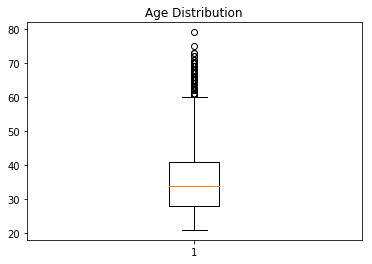

In [118]:
print(data['AGE'].value_counts().nlargest(10))
print('NANs found:', sum(data['AGE']==0)) 
plt.boxplot(data['AGE']) 
plt.title("Age Distribution")

0       4056
2000    1058
3000     667
5000     536
1500     398
Name: PAY_AMT1, dtype: int64


Text(0.5, 1.0, 'ADD TITLE')

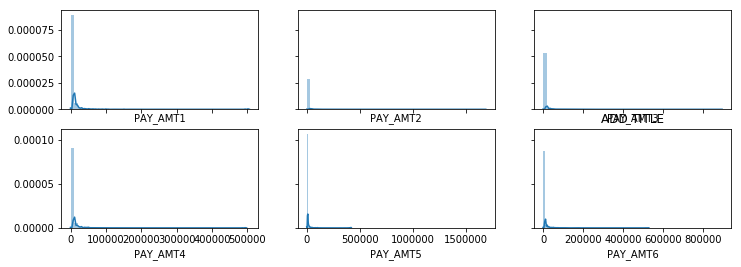

In [119]:
#things to consider, are the 0's here for the actual amount or representing nan
print(data['PAY_AMT1'].value_counts().nlargest(5))
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row', figsize=(12,4))
sns.distplot(data['PAY_AMT1'], ax=ax[0,0])
sns.distplot(data['PAY_AMT2'], ax=ax[0,1])
sns.distplot(data['PAY_AMT3'], ax=ax[0,2])
sns.distplot(data['PAY_AMT4'], ax=ax[1,0])
sns.distplot(data['PAY_AMT5'], ax=ax[1,1])
sns.distplot(data['PAY_AMT6'], ax=ax[1,2])
plt.title("ADD TITLE")

Looking at one of the six instances for previous payment amount we see the mode is 0, which means the minimum due amount was paid. -2 is included and the meaning is not described in the repo, but looking further we found 0 is minimum was paid, -1 balance was paid in full and -2 means no transactions occured that period. 

 0    11299
-1     4437
 1     2872
 2     2119
-2     1910
 3      248
 4       64
 8       17
 5       17
 6        9
 7        7
Name: PAY_0, dtype: int64


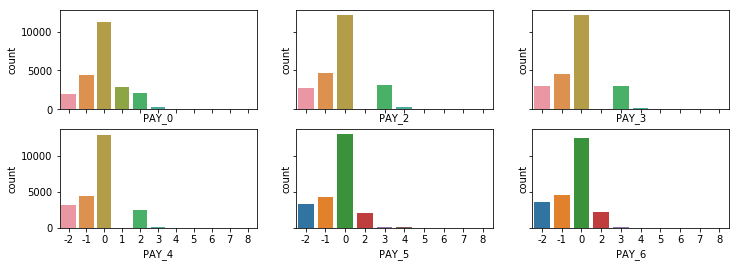

In [120]:
print(data['PAY_0'].value_counts())
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row', figsize=(12,4))
sns.countplot(x="PAY_0", data=data, ax=ax[0,0])
sns.countplot(x="PAY_2", data=data, ax=ax[0,1])
sns.countplot(x="PAY_3", data=data, ax=ax[0,2])
sns.countplot(x="PAY_4", data=data, ax=ax[1,0])
sns.countplot(x="PAY_5", data=data, ax=ax[1,1])
sns.countplot(x="PAY_6", data=data, ax=ax[1,2])

0      1515
390     187
780      63
316      55
326      55
Name: BILL_AMT1, dtype: int64


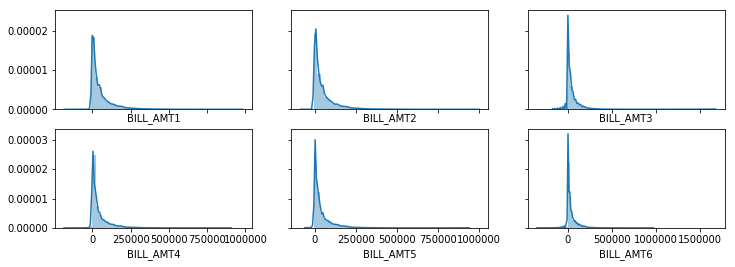

In [122]:
#things to consider, are the 0's here for the actual amount or representing nan
print(data['BILL_AMT1'].value_counts().nlargest(5))
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row', figsize = (12,4))
sns.distplot(data['BILL_AMT1'], ax=ax[0,0])
sns.distplot(data['BILL_AMT2'], ax=ax[0,1])
sns.distplot(data['BILL_AMT3'], ax=ax[0,2])
sns.distplot(data['BILL_AMT4'], ax=ax[1,0])
sns.distplot(data['BILL_AMT5'], ax=ax[1,1])
sns.distplot(data['BILL_AMT6'], ax=ax[1,2])

### Feature Correlation Exploration 

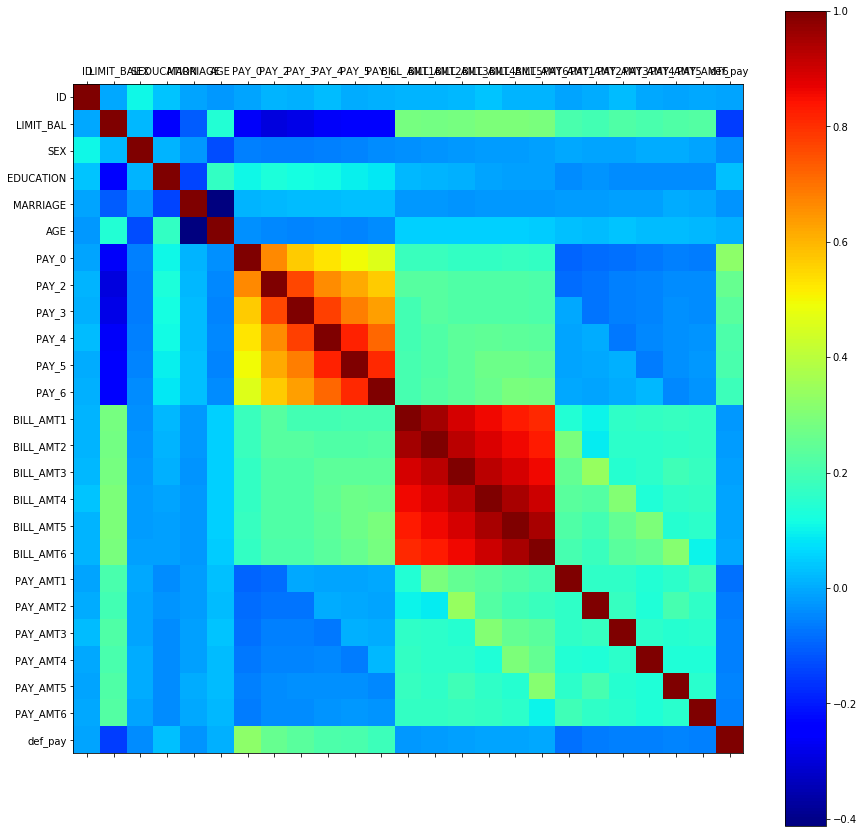

In [123]:
def plot_corr(df,size=15):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr,cmap=plt.get_cmap('jet'))
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.colorbar(cax)
plot_corr(data)

- There are two main part of correlation, one is PAY variables and Bill variables.
- Corrlation of payment status is decreasing by times go on. From current month to past month or next month have highest correlation. The lowest correlation is between September and April.
- Also, corrlation of bill is decreasing by times go on. From current month to past month or next month have highest correlation. And the lowest correlation is between September and April.

### Education and Sex

As far as education goes there seems to be pretty equal likeliness for each class. Male's tend to have a high default rate for each which is interesting considering this set contains almost double the amount of females.

Text(0.5, 1.0, 'Default by Education and Sex')

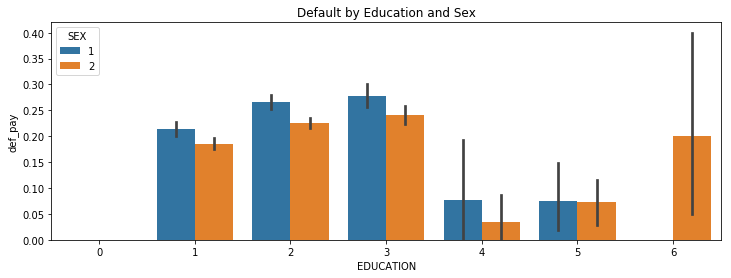

In [124]:
data['def_pay'].value_counts()
plt.figure(figsize=(12, 4))
sns.barplot(x="EDUCATION", y="def_pay", hue="SEX", data=data)
plt.title("Default by Education and Sex")

### Age
When checking if the age at which individuals default was correlated by gender, it can be observed that the age at which the sexes default is relatively similar.

Text(0.5, 1.0, 'Distribution of Default by Age')

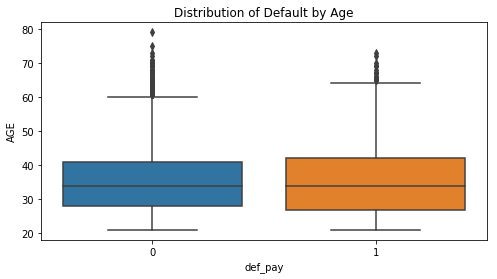

In [125]:
plt.figure(figsize=(8, 4))
sns.boxplot(x="def_pay", y="AGE", data=data)
plt.title("Distribution of Default by Age")

### Sex and Age
Below are violin plots where we visualize the distribution of ages based on an individual's sex and whether or not they default the next month. It was interesting to see that the two samples of those who default and those who didn't seemed to have similar distribution shapes, so by just looking only at a person's sex and age may not be the best to see if whether a person will default or not.

Text(0.5, 1.0, 'Distribution of Default by Sex and Age')

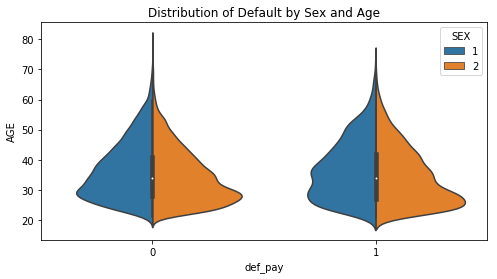

In [126]:
plt.figure(figsize=(8, 4))
sns.violinplot(x="def_pay", y="AGE", hue="SEX", data=data, split=True)
plt.title("Distribution of Default by Sex and Age")

### Credit Card limitation,group by Age and Gender(Side-by-side Barplot)



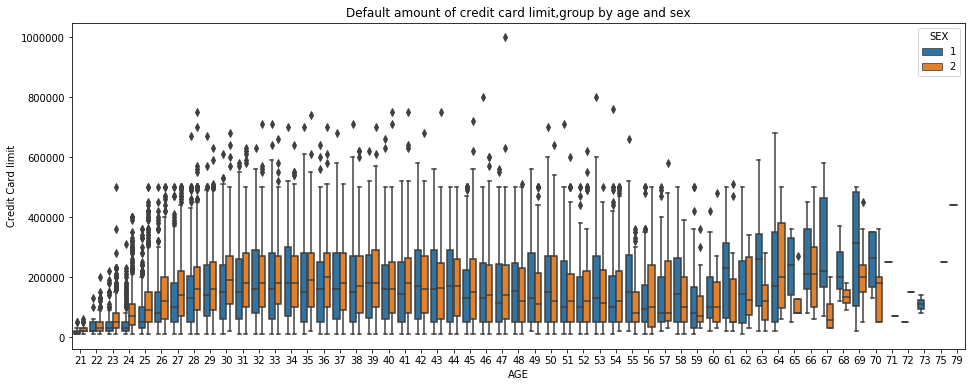

In [127]:
fig, ax1 = plt.subplots(ncols=1, figsize=(16,6))
sns.boxplot(ax=ax1, x="AGE", y="LIMIT_BAL", data=data,hue='SEX')
plt.ylabel('Credit Card limit')
plt.xlabel("AGE")
plt.title("Default amount of credit card limit,group by age and sex")
plt.show()

Mean of credit card limit is increasing from age 21 to age 35. And after 35 years old, the mean of limit is remain stable and it's little bit decreasing from 40 to 60. The obvious difference between male and female is age 65 to age 79, those age have extreme large diffences, for example, at age 39,48 until 60, the mean value for males are much larger than female.

### Marriage 

We may thinking about the marriage is a main factor to effect a person who with/without default payment.

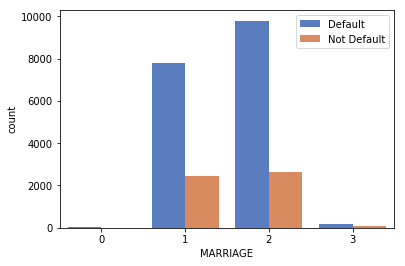

In [128]:
sns.countplot(x="MARRIAGE", data=data,hue="def_pay", palette="muted")
plt.legend(["Default","Not Default"])

- MARRIAGE: Marital status (1 = married; 2 = single; 3 = others).

As the plot shows, marriage people have less default payment issue compare with single people.
It states that marriage status is a factor to effect a default payment.

## Preprocessing 

### Feature Manipulation 
Since the Education column contained two unnamed values: 5 and 6, we decided to make both values 5 and delegate 5 as unknown.

In [129]:
data['EDUCATION'].loc[data['EDUCATION'] == 6]=5
data['def_pay'].value_counts()

0    17826
1     5173
Name: def_pay, dtype: int64

### Derived Features 

As part of our preprocessing, we decided to derive more features. We first summed the bill amount of each person between April 2005 -August 2005 since we were provided corresponding information on the payments for these specific months.

In [130]:
total_balance=data[['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
data['total_balance']=total_balance.sum(axis=1)

In [131]:
total_pay_amount=data[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4','PAY_AMT5']]
data['total_pay_amount']=total_pay_amount.sum(axis=1)

Not only are the total balances and total amounts important, but we also decided that looking at the difference between the two amounts might be valuable. We subtracted the total_pay_amount from total_balance in which we decided to see how much was left of the person's credit card balance between a specific time period.

In [132]:
data['total_diff']=data['total_balance']-data['total_pay_amount']

Another derived feature was summing the total pay information for each individual in which we could get an overall view of whether a person does not use their credit card too often or is consistently late on payments.

In [133]:
pay_len=data[['PAY_0', 'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
data['pay_over_time']=pay_len.sum(axis=1)

Because the values inputted in the PAY columns are negative and positive, the sum of these values do not show enough information of the person's credit card payment patterns. We decided to create four other features to reflect how many times they didn't use their credit card, paid their bill in full, used their revolving credit, and how many total months they were late on payments.

In [134]:
data['total_no_cons']=(pay_len ==-2 ).sum(axis=1)
data['total_full_pay']=(pay_len ==-1 ).sum(axis=1)
data['revolve_credit']=(pay_len ==0 ).sum(axis=1)
data['late_pays']=(pay_len >0 ).sum(axis=1)

### Distuingishing categorical and continuous variables 
We want to distinguish categorical and continuous variables. When unique value in a variable greater than 15, we consider as continuous variables otherwise we consider as categorical variable. Seperating continuous and categorical variables will help us to summary statistics better.

In [135]:
cat_v = []
con_v = []
for c in data.columns:
    if len(data[c].value_counts().index)<=15:
        cat_v.append(c)
    else:
        con_v.append(c)

In [136]:
print("The continuous variables: ", con_v, "\n")
print("The categorical variables: ", cat_v,"\n")
print("There are ",len(con_v)," continuous variables")
print("There are ",len(cat_v)," categorical variables")

The continuous variables:  ['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'total_balance', 'total_pay_amount', 'total_diff', 'pay_over_time'] 

The categorical variables:  ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'def_pay', 'total_no_cons', 'total_full_pay', 'revolve_credit', 'late_pays'] 

There are  19  continuous variables
There are  14  categorical variables


### Basic Feature Analysis 

Let's look more details to the data set.

_continuous variables_

we want to analyst continuous variables.

In [137]:
data[con_v].describe()


ID       LIMIT_BAL           AGE      BILL_AMT1  \
count  22999.000000    22999.000000  22999.000000   22999.000000   
mean   11500.000000   164486.442019     35.248446   50554.259011   
std     6639.383757   128760.864245      9.246032   72184.676041   
min        1.000000    10000.000000     21.000000 -165580.000000   
25%     5750.500000    50000.000000     28.000000    3739.000000   
50%    11500.000000   140000.000000     34.000000   22619.000000   
75%    17249.500000   230000.000000     41.000000   65805.500000   
max    22999.000000  1000000.000000     79.000000  964511.000000   

           BILL_AMT2     BILL_AMT3      BILL_AMT4      BILL_AMT5  \
count   22999.000000  2.299900e+04   22999.000000   22999.000000   
mean    48591.254055  4.627796e+04   42180.597765   39854.574547   
std     69992.406817  6.779663e+04   62589.126162   59845.421243   
min    -69777.000000 -1.572640e+05 -170000.000000  -46627.000000   
25%      3188.000000  2.863500e+03    2386.500000    1772.500000   
50%     21657.000000  2.019200e+04   19000.000000   18229.000000   
75%     62912.000000  5.925600e+04   51902.000000   49702.500000   
max    983931.000000  1.664089e+06  891586.000000  927171.000000   

           BILL_AMT6       PAY_AMT1      PAY_AMT2       PAY_AMT3  \
count   22999.000000   22999.000000  2.299900e+04   22999.000000   
mean    38427.959433    5507.591852  5.790085e+03    4891.841602   
std     58843.957229   15002.955947  2.096497e+04   15884.013642   
min   -339603.000000       0.000000  0.000000e+00       0.000000   
25%      1243.500000    1000.000000  8.000000e+02     375.500000   
50%     17126.000000    2100.000000  2.000000e+03    1700.000000   
75%     48757.000000    5000.000000  5.000000e+03    4243.500000   
max    961664.000000  505000.000000  1.684259e+06  896040.000000   

            PAY_AMT4       PAY_AMT5       PAY_AMT6  total_balance  \
count   22999.000000   22999.000000   22999.000000   2.299900e+04   
mean     4720.562720    4737.796209    5146.767512   2.153323e+05   
std     14834.198152   15168.979300   17632.322124   3.056818e+05   
min         0.000000       0.000000       0.000000  -3.371570e+05   
25%       276.000000     251.000000      66.000000   2.187800e+04   
50%      1500.000000    1500.000000    1495.000000   1.003020e+05   
75%      4000.000000    4000.000000    4000.000000   2.706520e+05   
max    497000.000000  417990.000000  528666.000000   4.299372e+06   

       total_pay_amount    total_diff  pay_over_time  
count      2.299900e+04  2.299900e+04   22999.000000  
mean       2.564788e+04  1.896845e+05      -0.964955  
std        4.712518e+04  2.909250e+05       5.884279  
min        0.000000e+00 -3.485650e+05     -12.000000  
25%        5.534000e+03  7.095000e+02      -5.000000  
50%        1.157500e+04  8.171000e+04       0.000000  
75%        2.699600e+04  2.406610e+05       0.000000  
max        2.287393e+06  3.201825e+06      36.000000

- The dataset contains 23,000 credit card clients.
- The mean of credit card balance limit is 164486. The standard deviation is extremely large and unusual, we noticed that the max value is 1 million that is much larger than Q3
- Average age is around 36 year old with standard deviation of 9.2. Minimum age is 21 and maximum age is 79.
- Other variables are people month bills and month payments.
- We added various derived features that will help us making the good prediction.

__categorical variables__

Now, let's check categorical variables.

In [138]:
pd.DataFrame(data[cat_v], dtype='object').describe()


SEX  EDUCATION  MARRIAGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  \
count   22999      22999     22999  22999  22999  22999  22999  22999  22999   
unique      2          6         4     11     11     11     11     10     10   
top         2          2         2      0      0      0      0      0      0   
freq    14223      10870     12420  11299  12088  12117  12786  13003  12373   

        def_pay  total_no_cons  total_full_pay  revolve_credit  late_pays  
count     22999          22999           22999           22999      22999  
unique        2              7               7               7          7  
top           0              0               0               6          0  
freq      17826          18117           15054            7484      15087

- More than half clients are women.
- Education level is mostly university.
- Half of clients are single.
- Most of clients have no payment issues.

### Data Separation 

Several other features also represented factors better than they represented numeric values. For example, gender, marriage, and education also do not follow the standard numerical rulesare better as categories. The individual Pay columns also benefit from being factors.

In [139]:
as_category = ['PAY_0', 'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','SEX','EDUCATION','MARRIAGE']

*Array* of numeric data labels

In [140]:
as_numeric = ['ID','LIMIT_BAL','AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
             'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4','PAY_AMT5', 'PAY_AMT6','total_balance','total_pay_amount','total_diff',
             'pay_over_time','total_no_cons','total_full_pay','revolve_credit','late_pays']

*Vector* of output labels

In [141]:
labels = ['default.payment.next.month']

### Preprocessing Definition 

In [142]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
         return X[self.attribute_names]

In [143]:
class DummyEncoder(TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
    def transform(self, X, y=None, **kwargs):
        return pd.get_dummies(X, columns=self.columns)
    def fit(self, X, y=None, **kwargs):
        return self

## Pipelines 

In [144]:
num_pipe=Pipeline([
        ("selector", DataFrameSelector(as_numeric)),
        ("scale", StandardScaler())
        ])

In [145]:
cat_pipe=Pipeline([
        ("selector", DataFrameSelector(as_category)),
        ("convert", DummyEncoder(columns=as_category)),
        ("scale", StandardScaler())
        ])


In [146]:
full_pipeline = FeatureUnion(transformer_list=[
        ("cat_pipeline", cat_pipe ),
        ("num_pipeline", num_pipe ),
        ])

In [147]:
import warnings
warnings.filterwarnings('ignore')
data_prepared = full_pipeline.fit_transform(data)

## Data Modeling 

Spliting the data into training set and testing set. 

In [148]:
import random
#split the train data and test data
random.seed(777)
train_data = data.sample(frac=5/6, replace=False)
test_data = data.sample(frac=1/6, replace=False)
print (train_data.shape)
print (test_data.shape)

(19166, 33)
(3833, 33)


Dropping the target column and ID column

In [149]:
y_train = train_data['def_pay']
y_test=test_data['def_pay']
X_train = train_data.drop(['def_pay', 'ID'], axis= 1)
X_test = test_data.drop(['def_pay', 'ID'], axis= 1)
print (y_train.shape)
print (y_test.shape)
print (X_train.shape)
print (X_test.shape)

(19166,)
(3833,)
(19166, 31)
(3833, 31)


## Dimensionality Reduction 

__PCA__ 

We first use PCA to find the optimum number of dimensions, with 25 dimensions, the original number of dimensions before derived and dummie features were added, we see about 12% of the datas variance lies along the first axis.

In [150]:
pca = PCA(n_components = 23)
X25D = pca.fit_transform(X_train)
print(pca.explained_variance_ratio_)

[9.01887592e-01 6.80725829e-02 1.40479529e-02 5.98212197e-03
 2.88183052e-03 1.72900118e-03 1.47057479e-03 1.22688102e-03
 1.10988289e-03 5.08887734e-04 4.78581946e-04 3.33819008e-04
 2.70290416e-04 3.67130033e-10 1.42204399e-10 2.72991518e-11
 1.63351375e-11 3.78715497e-12 2.40907704e-12 2.33390170e-12
 1.58229462e-12 1.20002003e-12 1.06547465e-12]


We then ran a form of PCA which would find the number of copmonents which would be required to get 95%. After running this we saw 50 was the minimum number of components needed to preserve 95% of the training set's variance. We plotted the cumsum and found the elbow to appear around 50. Since 50 principle components is not ideal we decided to explore other dimensionality reduction techniques.

2
[0.90188759 0.06807258]


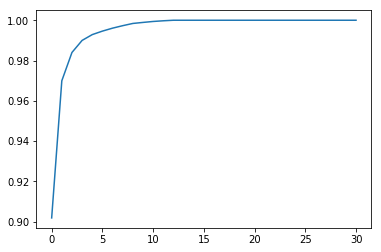

In [151]:
pca2 = PCA()
pca2.fit(X_train)
cumsum = np.cumsum(pca2.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print(d)
pca2 = PCA(n_components = d)
XdD = pca2.fit_transform(X_train)
print(pca2.explained_variance_ratio_)
plt.plot(cumsum)

## LLE 

Since PCA did not work well with our dataset, we moved onto locally linear embedding to try and reduce our dimensions. Using LLE we reduced our dimensions to 2. We later tested the reduced dimensions with LLE.

In [152]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X_train)

In [153]:
X_reduced

array([[ 3.84559504e-03,  4.89500876e-03],
       [-1.63997645e-03,  1.10142757e-03],
       [ 1.46721664e-03,  3.82023198e-03],
       ...,
       [ 6.45182841e-03, -2.98747074e-03],
       [-7.60233018e-05,  6.55153865e-03],
       [-1.72576236e-03,  2.37229150e-03]])

### Random Forrest Classifier 

We used random forest tree model as our first baseline model since:

1. Random Forest is a flexible algorithm that uses several tree models to split the data into two groups based on one of the predictors repeatedly until several groups are formed.
2. Random Forest is a very effective classification method, when dealing with a mixture of several numerical and categorical variables.
3. By principle since it randomizes the variable selection during each tree split it's not prone to overfit unlike other models. Also,We don't need to pre-precessing data too much.

In [187]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(class_weight = {0:1, 1:3})
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
acc_RF = round(accuracy_score(y_test,y_pred) * 100, 2)
print(RF.score(X_train, y_train))
print (acc_RF,"%")

0.9804862777835751
95.38 %


We can see the score is not too far away from the test predition, so it's not overfiting.

We use the Grid search cross validation to fine-tune the parameter for random forester model, which also can help use prevent the model overfitting.

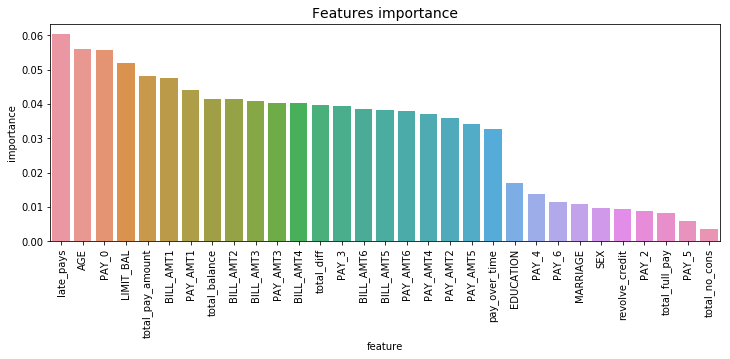

In [189]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = RF.feature_importances_
features = features.sort_values(by='importance',ascending=False)
plt.figure(figsize = (12,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='feature',y='importance',data=features)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

From the plot, we can see the most important seven columns are PAY_0, AGE, BILL_AMT1, LIMIT_BAL, BILL_AMT2, PAY_AMT1，PAY_AMT2

In [190]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
def search_model(X_reduced, y_train, est, param_grid, n_jobs, cv):
    model = GridSearchCV(estimator  = est,
                                     param_grid = param_grid,
                                     scoring = 'f1_weighted',
                                     verbose = 10,
                                     n_jobs = n_jobs,
                                     iid = True,
                                     cv = cv)
    # Fit Grid Search Model
    model.fit(X_reduced, y_train)   
    return model

Grid search is actually using cross validation method to tune parameters, which is to scan all posible parameter combinations and return the best one.

In [191]:
param_grid = {'n_estimators':[100,300,500],
             'criterion':['gini', 'entropy'],
             'class_weight': [{0:1, 1:3}]}

RF = search_model(X_train, y_train
            , RandomForestClassifier()
            , param_grid
            , -1
            , 5)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
acc_RF = round(accuracy_score(y_test,y_pred) * 100, 2)
print(RF.score(X_train, y_train))
print (acc_RF,"%")

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  3.6min remaining:   24.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.2min finished


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   53.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  3.4min remaining:   22.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.9min finished


0.9996348448202215
96.76 %


__After tune the parameters, the predicting accuracy reach up to 96.76%, and the model score accuracy reach up to 99.91%__

In [218]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2917
           1       0.96      0.90      0.93       916

   micro avg       0.97      0.97      0.97      3833
   macro avg       0.97      0.94      0.95      3833
weighted avg       0.97      0.97      0.97      3833



#### ROC Curves 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:   21.3s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   25.2s finished


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:   24.7s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   28.6s finished


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:   23.7s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   27.1s finished


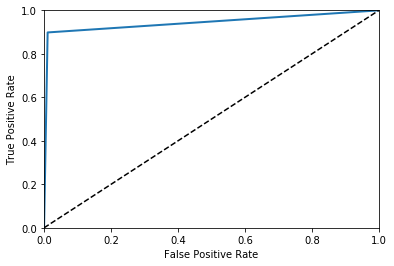

In [220]:
y_scores_reg = cross_val_predict(RF, X_test, y_test, cv=3)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.axis([0, 1, 0, 1])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

__We can see that this model is performing pretty well.__

__Logistic regression__

- Like all regression analyses, the logistic regression is a predictive analysis. Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.
- We can use it to determin our binary results ('default payment next month') in this dataset.

In [199]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_log = model.predict(X_test)
acc_log = round(accuracy_score(y_test,y_pred_log) * 100, 2)
print (acc_log,"%")

76.18 %



__LogisticCV regression__

- LogisticCV regression is similar to the logistic regreesion, and with 10-fold cross-validation, which also prevent the overfitting.

In [200]:
from sklearn.linear_model import LogisticRegressionCV
model = LogisticRegressionCV()
model.fit(X_train, y_train)
y_pred_logcv = model.predict(X_test)
acc_logcv = round(accuracy_score(y_test,y_pred_logcv) * 100, 2)
print (acc_logcv,"%")

76.1 %


__Support vector machine(SVM)__

- Support vector machines is supervised learning models with associated learning algorithms that analyze data used for classification analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other.

In [208]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
y_pred_svc = model.predict(X_test)
acc_svc = round(accuracy_score(y_test,y_pred_svc) * 100, 2)
print (acc_svc,"%")

95.7 %


__K-nearest neighbors algorithm(KNN)__

- In k-NN classification, the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors. KNN function is only approximated locally and all computation is deferred until classification.

In [212]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train)
y_pred_knn = model.predict(X_test)
acc_knn = round(accuracy_score(y_test,y_pred_knn) * 100, 2)
print (acc_knn,"%")

81.61 %


__Decision Tree__

- A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label. It's more like the random forest but only use one tree to classifier the data.

In [214]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred_DT = model.predict(X_test)
acc_DT = round(accuracy_score(y_test,y_pred_DT) * 100, 2)
print (acc_DT,"%")

95.07 %


### Accuracy Summary 

In [216]:
acc = pd.DataFrame()
acc['Accuracy(%)'] = [acc_RF,acc_log,acc_logcv,acc_svc,acc_knn,acc_DT]
acc['Method']=['Random Forest','Logistic','LogisticCV',"SVM",
               "KNN","Decision Tree"]
acc.index=acc.Method
acc = acc.sort_values(by='Accuracy(%)',ascending=False)
print(acc.drop(['Method'],axis=1))

               Accuracy(%)
Method                    
Random Forest        96.76
SVM                  95.70
Decision Tree        95.07
KNN                  81.61
Logistic             76.18
LogisticCV           76.10


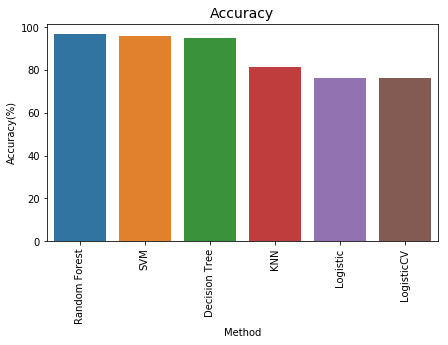

In [217]:
plt.figure(figsize = (7,4))
plt.title('Accuracy',fontsize=14)
s = sns.barplot(x='Method',y='Accuracy(%)',data=acc)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

__As we can see, the better performing model is Random Forest with the accuracy of 96.76%__

## Conclusion 

After exploring, manipulating and experimenting with different models on the credit card default data set we have obtained a maximum accuracy of 96.76% to determine whether a person will pay back loan or not.

First we derived new features from the data set. Since this resulted in about 100 features we explored dimensionality reduction. Using the second form of reduction, LLE, we ran our initial classification models, Random Forrest, SVM, Decision Tree, KNN, Logistic Regression, LogisticCC with original training set and the reduced set. Seeing no improvement with the set produced in LLE we continued using our original training set.

Next we fine-tuned the better performing model, Random Forrest, with GridSearchCV as another attempt to improve the model. After using GridSearchCV, some improvements were seen and the accuracy was increased. 

With that model __96.76% accuracy__ is achieved. 